In [1]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde
from deepxde.backend import tf

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


Given Differential equation,

$$\frac{d^2y}{dx^2} + \pi^2 \sin(\pi x) = 0$$

The boundary conditions are,
$$y(-1) = y(1) = 0$$

The exact solution is,
$$y(x) = \sin(\pi x)$$

In [10]:
def pde(x, y):
    d2y_dx2 = dde.grad.hessian(y, x)
    return d2y_dx2 + (tf.constant(np.pi) ** 2) * tf.sin(tf.constant(np.pi) * x)

def exact_sol(x):
    return np.sin(np.pi*x)

In [11]:
geom = dde.geometry.Interval(-1, 1)

In [12]:
def boundary(x, on_boundary):
    return on_boundary

def boundary_func(x):
    return 0

In [13]:
bc = dde.icbc.DirichletBC(geom, boundary_func, boundary)
data = dde.data.PDE(geom, pde, bc, 20, 2, solution=exact_sol, num_test=100)

In [14]:
layer_size = [1] + [50]*2 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

In [16]:
model = dde.Model(data, net)
model.compile("adam", lr=1e-3, metrics=["l2 relative error"])
losshistory, train_state =  model.train(iterations=1000)

Compiling model...
'compile' took 0.371301 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [4.77e+01, 1.84e-03]    [4.95e+01, 1.84e-03]    [1.03e+00]    
1000      [2.66e-04, 5.63e-08]    [3.65e-04, 5.63e-08]    [4.67e-04]    

Best model at step 1000:
  train loss: 2.66e-04
  test loss: 3.65e-04
  test metric: [4.67e-04]

'train' took 1.592013 s



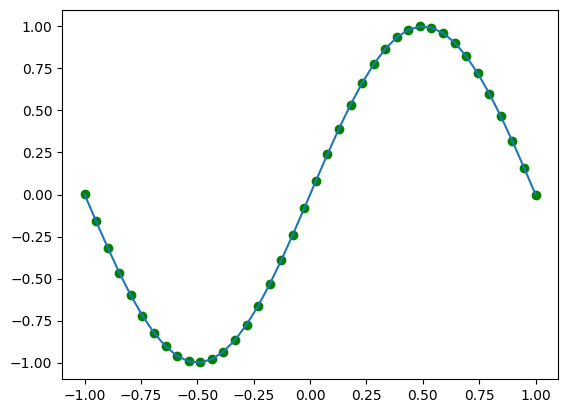

In [17]:
x = geom.uniform_points(40, True)
y_pred = model.predict(x)
y_exact = exact_sol(x)
plt.plot(x, y_pred, 'og')
plt.plot(x, y_exact)
plt.show()

# Dirichilet and Neumann Boundary condition

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde
dde.backend.backend_name = "pytorch"

Given Differential equation,

$$\frac{d^2y}{dx^2}  = 2$$

The Dirichilet boundary condition,
$$y(-1) = 0$$

The Neumann boundary condition,
$$\left. \frac{dy}{dx} \right|_{x=1} = 4$$
The exact solution is,
$$y(x) = (x+1)^2$$

In [10]:
def pde(x, y):
    d2y_dx2 = dde.grad.hessian(y, x)
    return d2y_dx2 - 2

def exact_sol(x):
    return (x+1)**2

In [6]:
geom = dde.geometry.Interval(-1, 1)

In [7]:
def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], -1)

def bounadry_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)

In [8]:
bc_l = dde.icbc.DirichletBC(geom,  lambda x: 0, boundary_l)
bc_r = dde.icbc.NeumannBC(geom, lambda x: 4, bounadry_r)

In [11]:
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 16, 2, solution=exact_sol, num_test=100)

In [13]:
layer_size = [1] + [50]*3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

Compiling model...
Building feed-forward neural network...
'build' took 0.083711 s

'compile' took 0.661181 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [3.99e+00, 2.94e-01, 1.28e+01]    [4.04e+00, 2.94e-01, 1.28e+01]    [8.92e-01]    
1000      [6.31e-04, 1.13e-08, 1.15e-07]    [5.23e-04, 1.13e-08, 1.15e-07]    [1.13e-03]    
2000      [2.53e-04, 6.20e-07, 1.40e-07]    [2.06e-04, 6.20e-07, 1.40e-07]    [8.63e-04]    
3000      [8.23e-05, 2.09e-06, 1.73e-08]    [4.98e-05, 2.09e-06, 1.73e-08]    [1.47e-03]    
4000      [3.35e-05, 2.67e-09, 6.42e-09]    [2.61e-05, 2.67e-09, 6.42e-09]    [1.76e-04]    
5000      [2.88e-05, 1.29e-05, 1.02e-05]    [2.55e-05, 1.29e-05, 1.02e-05]    [1.23e-03]    
6000      [2.53e-05, 2.30e-08, 2.45e-08]    [2.29e-05, 2.30e-08, 2.45e-08]    [3.64e-04]    
7000      [4.27e-05, 6.82e-05, 9.48e-05]    [4.72e-05, 6.82e-05, 9.48e-05]    [3.29e-03]    
8000      [2.27e-05, 7.69e-11, 3.

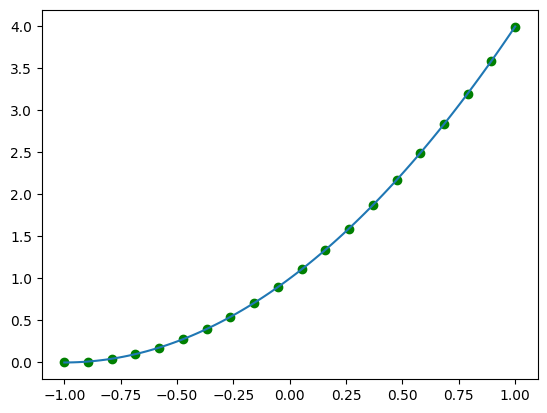

In [15]:
x = geom.uniform_points(20, True)
x_exact = np.linspace(-1, 1, 100)
y_pred = model.predict(x)
y_exact = exact_sol(x_exact)
plt.plot(x, y_pred, 'og')
plt.plot(x_exact, y_exact)
plt.show()

# Robin Boundary Condition

Given Differential equation,

$$\frac{d^2y}{dx^2}  = 2$$

The Dirichilet boundary condition,
$$y(-1) = 0$$

The Robin boundary condition,
$$\left. \frac{dy}{dx} \right|_{x=1} = y$$
The exact solution is,
$$y(x) = (x+1)^2$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde
dde.backend.backend_name = "pytorch"

In [31]:
def pde(x, y):
    d2y_dx2 = dde.grad.hessian(y, x)
    return d2y_dx2 - 2

def exact_sol(x):
    return (x+1)**2

In [32]:
geom = dde.geometry.Interval(-1, 1)

In [33]:
def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], -1)

def bounadry_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)

In [34]:
bc_l = dde.icbc.DirichletBC(geom,  lambda x: 0, boundary_l)
bc_r = dde.icbc.RobinBC(geom, lambda x, y: y, bounadry_r)

In [35]:
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 16, 2, solution=exact_sol, num_test=100)

In [36]:
layer_size = [1] + [50]*3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

Compiling model...
Building feed-forward neural network...
'build' took 0.108111 s

'compile' took 0.756763 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [4.06e+00, 2.52e-01, 5.48e-03]    [4.02e+00, 2.52e-01, 5.48e-03]    [1.12e+00]    
1000      [2.69e-05, 1.61e-08, 5.04e-08]    [2.25e-05, 1.61e-08, 5.04e-08]    [5.58e-04]    
2000      [1.83e-05, 1.07e-06, 4.72e-06]    [1.53e-05, 1.07e-06, 4.72e-06]    [8.66e-04]    
3000      [2.16e-05, 1.41e-05, 3.33e-05]    [1.91e-05, 1.41e-05, 3.33e-05]    [2.01e-03]    
4000      [9.02e-06, 2.15e-09, 6.12e-09]    [9.93e-06, 2.15e-09, 6.12e-09]    [3.13e-04]    
5000      [9.03e-06, 2.98e-06, 7.84e-06]    [8.24e-06, 2.98e-06, 7.84e-06]    [1.07e-03]    
6000      [4.48e-06, 5.69e-09, 1.54e-10]    [5.35e-06, 5.69e-09, 1.54e-10]    [2.54e-04]    
7000      [2.49e-06, 1.10e-11, 8.19e-10]    [3.41e-06, 1.10e-11, 8.19e-10]    [2.38e-04]    
8000      [1.20e-06, 2.64e-11, 3.

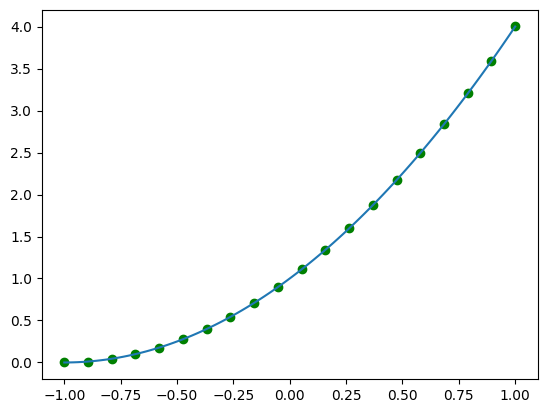

In [37]:
x = geom.uniform_points(20, True)
x_exact = np.linspace(-1, 1, 100)
y_pred = model.predict(x)
y_exact = exact_sol(x_exact)
plt.plot(x, y_pred, 'og')
plt.plot(x_exact, y_exact)
plt.show()

# Periodic Boundary Condition

Given Differential equation,

$$\frac{d^2y}{dx^2} + \pi^2 \sin(\pi x) = 0$$

The Dirichlet boundary condition,
$$y(-1) = 0$$

The Periodic boundary condition,
$$y(-1) = y(1)$$

The exact solution is,
$$y(x) = \sin(\pi x)$$

In [1]:
import os
os.environ["DDE_BACKEND"] = "pytorch"
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde
import torch

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
def pde(x, y):
    d2y_dx2 = dde.grad.hessian(y, x)
    return d2y_dx2 + (torch.tensor(np.pi) ** 2) * torch.sin(torch.tensor(np.pi) * x)

def exact_sol(x):
    return np.sin(np.pi*x)

In [3]:
geom = dde.geometry.Interval(-1, 1)

In [4]:
def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], -1)

def bounadry_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)

In [5]:
bc_l = dde.icbc.DirichletBC(geom,  lambda x: 0, boundary_l)
bc_r = dde.icbc.PeriodicBC(geom, 0, bounadry_r, derivative_order=0, component=0)

In [6]:
data = dde.data.PDE(geom, pde, [bc_l, bc_r], 20, 2, solution=exact_sol, num_test=100)

In [7]:
layer_size = [1] + [50]*3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

Compiling model...
'compile' took 4.231911 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [4.59e+01, 2.12e-01, 8.47e-01]    [4.77e+01, 2.12e-01, 8.47e-01]    [7.37e-01]    
1000      [1.09e-03, 1.40e-08, 1.50e-07]    [9.35e-04, 1.40e-08, 1.50e-07]    [1.08e-03]    
2000      [1.31e-04, 3.41e-08, 1.22e-07]    [1.77e-04, 3.41e-08, 1.22e-07]    [6.21e-04]    
3000      [2.11e-04, 2.54e-05, 1.02e-04]    [2.17e-04, 2.54e-05, 1.02e-04]    [5.33e-03]    
4000      [4.19e-05, 7.11e-10, 1.78e-11]    [6.51e-05, 7.11e-10, 1.78e-11]    [3.96e-04]    
5000      [3.90e-05, 5.76e-08, 1.24e-07]    [5.87e-05, 5.76e-08, 1.24e-07]    [4.88e-04]    
6000      [3.25e-05, 4.61e-10, 2.73e-10]    [5.11e-05, 4.61e-10, 2.73e-10]    [3.54e-04]    
7000      [2.95e-05, 8.67e-09, 1.49e-08]    [4.66e-05, 8.67e-09, 1.49e-08]    [3.40e-04]    
8000      [3.41e-05, 1.22e-06, 3.74e-06]    [4.87e-05, 1.22e-06, 3.74e-06]    [1.12e-03]    
9000 

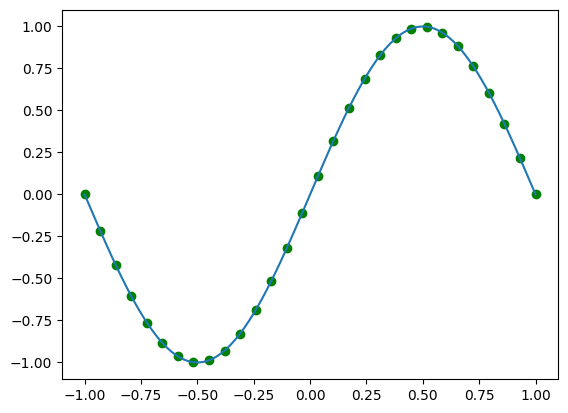

In [11]:
x = geom.uniform_points(30, True)
x_exact = np.linspace(-1, 1, 100)
y_pred = model.predict(x)
y_exact = exact_sol(x_exact)
plt.plot(x, y_pred, 'og')
plt.plot(x_exact, y_exact)
plt.show()

In [12]:
x = geom.uniform_points(10)
periodic_points = bc_r.collocation_points(x)
x, periodic_points

(array([[-1.        ],
        [-0.7777778 ],
        [-0.5555556 ],
        [-0.33333334],
        [-0.11111111],
        [ 0.11111111],
        [ 0.33333334],
        [ 0.5555556 ],
        [ 0.7777778 ],
        [ 1.        ]], dtype=float32),
 array([[ 1.],
        [-1.]], dtype=float32))

# Custom Boundary Condition

Given Differential equation,

$$\frac{\partial^4{y}}{\partial{x}^4} + 1 = 0 $$

The Dirichilet boundary condition,
$$y(0) = 0$$

The Neumann boundary condition,
$$y'(0) = 0$$
The boundary conditions are,
$$y''(1) = 0, \;\; y'''(1)=0$$
The exact solution is,
$$y(x) =-\frac{1}{24}x^4 + \frac{1}{6}x^3 - \frac{1}{4}x^2$$

In [1]:
import os
os.environ["DDE_BACKEND"] = "pytorch"
import numpy as np
import matplotlib.pyplot as plt
import deepxde as dde
import torch

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [22]:
def pde(x, y):
    d2y_dx2 = dde.grad.hessian(y, x)
    d4y_dx4 = dde.grad.hessian(d2y_dx2, x)
    return d4y_dx4 + 1

def exact_sol(x):
    return (-1/24)*x**4 + (1/6)*x**3 - (1/4)*x**2

In [23]:
def boundary_value_l(x):
    return 0

def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 0)

In [24]:
def d2y(x, y):
    return dde.grad.hessian(y, x)

def d3y(x, y):
    return dde.grad.jacobian(d2y(x, y), x)

def boundary_second_derivative(x, y, _):
    return d2y(x, y)

def boundary_third_derivative(x, y, _):
    return d3y(x, y)

def boundary_r(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0], 1)

In [25]:
geom = dde.geometry.Interval(0, 1)

In [26]:
bc_dbc = dde.icbc.DirichletBC(geom, boundary_value_l, boundary_l)
bc_nbc = dde.icbc.NeumannBC(geom, boundary_value_l, boundary_l)

bc_obc1 = dde.icbc.OperatorBC(geom, boundary_second_derivative, boundary_r)
bc_obc2 = dde.icbc.OperatorBC(geom, boundary_third_derivative, boundary_r)

In [27]:
data = dde.data.PDE(geom, pde, [bc_dbc, bc_nbc, bc_obc1, bc_obc2], 20, 2, solution=exact_sol, num_test=100)

In [29]:
layer_size = [1] + [50]*3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=3000)

Compiling model...
'compile' took 0.000347 s

Training model...

0         [4.60e-01, 0.00e+00, 2.37e-01, 3.73e-02, 1.11e-04]    [4.23e-01, 0.00e+00, 2.37e-01, 3.73e-02, 1.11e-04]    [3.15e+00]    
1000      [4.37e-04, 6.30e-08, 1.59e-06, 2.24e-06, 9.50e-07]    [3.07e-04, 6.30e-08, 1.59e-06, 2.24e-06, 9.50e-07]    [1.66e-02]    
2000      [3.17e-03, 3.40e-06, 1.72e-04, 1.16e-05, 4.48e-05]    [2.96e-03, 3.40e-06, 1.72e-04, 1.16e-05, 4.48e-05]    [1.19e-01]    
3000      [7.99e-05, 1.25e-10, 9.68e-10, 5.45e-08, 1.04e-08]    [6.63e-05, 1.25e-10, 9.68e-10, 5.45e-08, 1.04e-08]    [2.04e-04]    

Best model at step 3000:
  train loss: 7.99e-05
  test loss: 6.64e-05
  test metric: [2.04e-04]

'train' took 29.775897 s



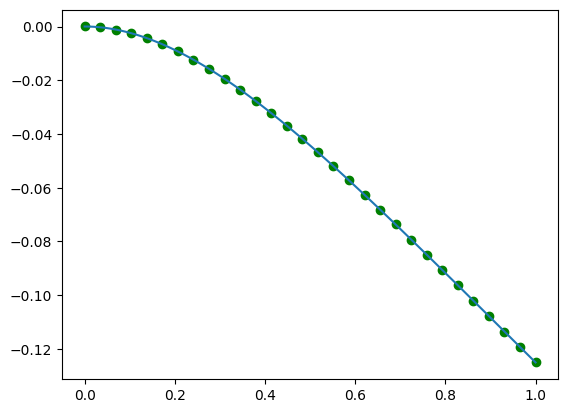

In [30]:
x = geom.uniform_points(30, True)
x_exact = np.linspace(0, 1, 100)
y_pred = model.predict(x)
y_exact = exact_sol(x_exact)
plt.plot(x, y_pred, 'og')
plt.plot(x_exact, y_exact)
plt.show()